In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import polars as pl
from plato.fov import find_targets

In [2]:
## Read all data, find targets in FOV and save them

# data = pl.read_csv("../data/raw/plato_targets.csv")

## add num_CCDs column
# data = find_targets(data)
# print(f"Number of targets found: {(data["num_CCDs_LOPS2"] > 0).sum()}")
# data.write_csv("../data/raw/plato_targets.csv")

## find targets without added argument for location defaults to LOPS2 field
# data_LOPS2 = data.filter(data["num_CCDs_LOPS2"] > 0)
# data_LOPS2.write_csv("../data/raw/plato_targets_LOPS2.csv")

In [3]:
data = pl.read_csv("../data/raw/plato_targets_LOPS2.csv")

In [4]:
targets = (
    data.filter(data["num_CCDs_LOPS2"] > 0)
    .select(["l", "b", "num_CCDs_LOPS2", "flag"])
    .to_pandas()
)
target_coords = SkyCoord(l=targets["l"], b=targets["b"], unit="deg", frame="galactic")

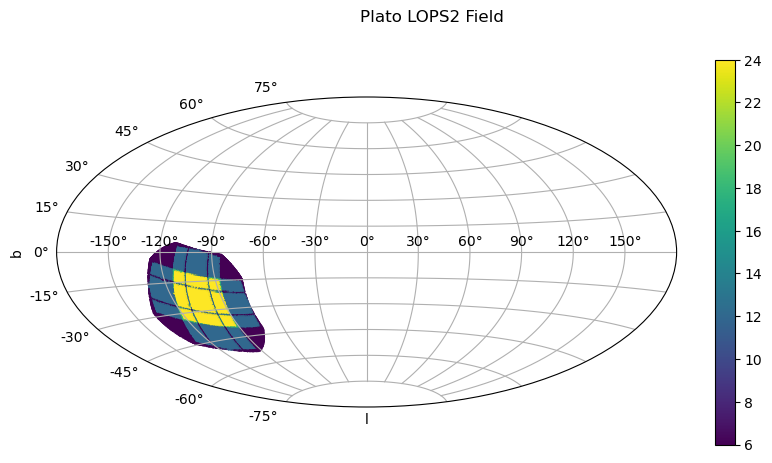

In [5]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Plato LOPS2 Field")
ax = fig.add_subplot(111, projection="aitoff")
sc = ax.scatter(
    target_coords.l.wrap_at("180d").rad,
    target_coords.b.rad,
    c=targets["num_CCDs_LOPS2"] * 6,
    cmap="viridis",
    s=0.01,
)
ax.grid()
ax.set_xlabel("l")
ax.set_ylabel("b")
# add colorbar
cbar = plt.colorbar(sc)

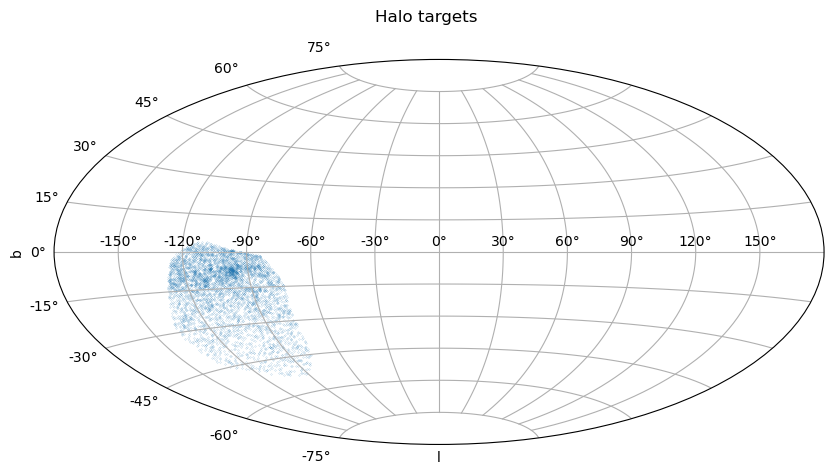

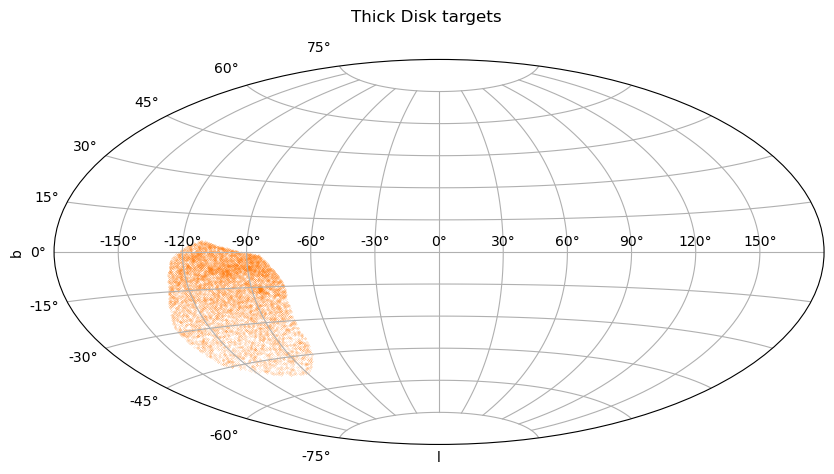

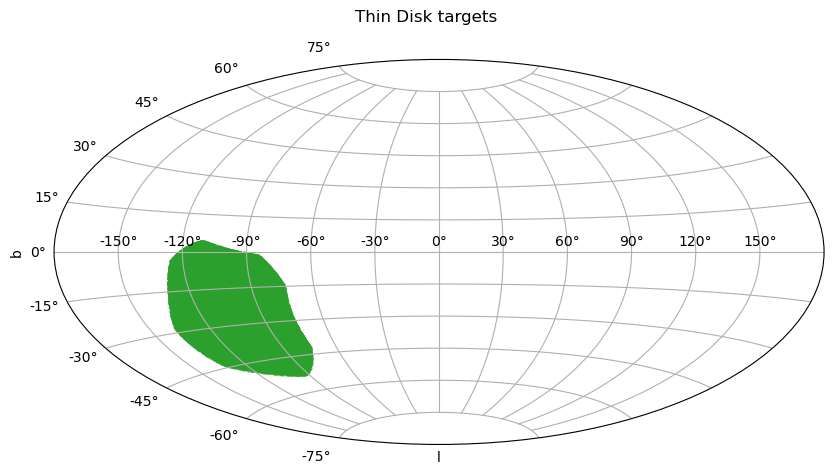

In [6]:
for flag, name in {0: "Halo", 1: "Thick Disk", 2: "Thin Disk"}.items():
    coords = target_coords[targets["flag"] == flag]

    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f"{name} targets")
    ax = fig.add_subplot(111, projection="aitoff")
    ax.scatter(
        coords.l.wrap_at("180d").rad,
        coords.b.rad,
        color=f"C{flag}",
        s=0.01,
    )
    ax.grid()
    ax.set_xlabel("l")
    ax.set_ylabel("b")